研究室の学生用に、pythonのmatplotlibで図を作成するときに**気を使って欲しい点**をまとめた。**気をつけて欲しい点**は**太字**で記述する。
まずは、図を描いてみる。
適当に座標(x)を設定して、sinカーブを描く。

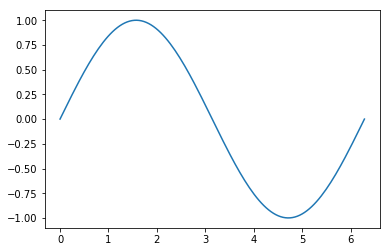

In [4]:
#Jupyter notebookのための設定
%matplotlib inline

#ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt


#座標の設定
x = np.linspace(0,2*np.pi,128)
y = np.sin(x)

#プロット
plt.plot(x,y)

**このままだと文字が小さくて見にくいので文字を大きくする。**
**横軸と縦軸に名前をつけて、範囲を指定する。**

(0, 1)

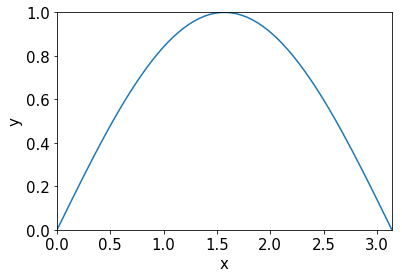

In [5]:
x = np.linspace(0,2*np.pi,128)
y = np.sin(x)

#文字の大きさを設定
plt.rcParams["font.size"] = 15

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")

plt.xlim(0,np.pi)
plt.ylim(0,1)

一つの図にパネルを複数描きたいときは、オブジェクト指向的にmatplotlibを使う。

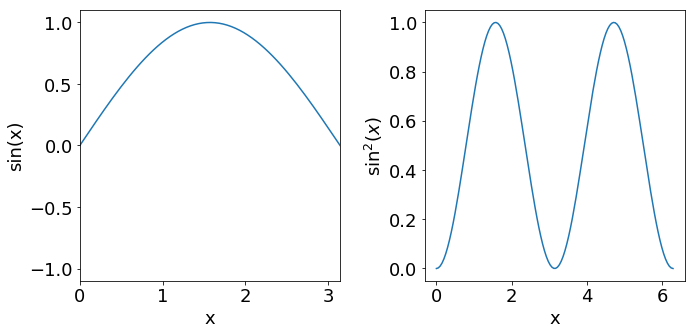

In [6]:
x = np.linspace(0,2*np.pi,128)
y = np.sin(x)

#字を大きく
plt.rcParams["font.size"] = 18

# figureを生成
# numはfigure番号、新しいウィンドウを開くときは違う番号にする
# figsizeは画面の大きさ
fig = plt.figure(num=100,figsize=(10, 5))

#add_subplotでパネル(axes)を生成
#引数はnmlとなっていて
#n: 行数, m: 列数, l: 今回生成するパネル番号
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(x,y)
ax2.plot(x,y**2)

#軸の名前を設定
#axesを設定したときは、軸の名前の設定の仕方が少し違う
#set_　が必要になる。
ax1.set_xlabel("x")
ax1.set_ylabel("sin(x)")
ax2.set_xlabel("x")
# $$でくくることでlatexが使える
ax2.set_ylabel("$\sin^2(x)$")

#範囲の設定の仕方も変わる。set_ が必要になる。
ax1.set_xlim(0,np.pi)

#文字が重ならないようにするため
plt.tight_layout()

一つのパネルに複数の図をプロットするときは、線の色を変えるか線種を変える。
matplotlibのデフォルトの色の順番は、**視認性が悪いように感じる**ので、black, red, blue, greenなどのように線の色を変えていく。
また、どの色が何のプロットかを表すために、それぞれのプロットにlabelを付けた上でlegendを使う。

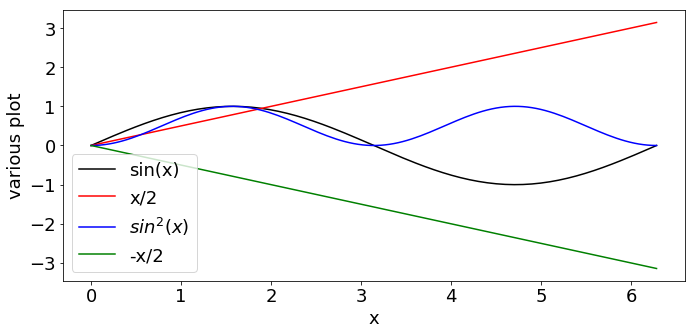

In [19]:
x = np.linspace(0,2*np.pi,128)
y = np.sin(x)

#これまでと同じ設定
plt.rcParams["font.size"] = 18
fig = plt.figure(num=100,figsize=(10, 5))
ax1 = fig.add_subplot(111)

#4個のプロットを行う
ax1.plot(x,y,color="black",label="sin(x)")
ax1.plot(x,x/2,color="red",label="x/2")
ax1.plot(x,y**2,color="blue",label="$sin^2(x)$")
ax1.plot(x,-x/2,color="green",label="-x/2")

ax1.legend()

#軸の名前を設定
#axesを設定したときは、軸の名前の設定の仕方が少し違う
#set_　が必要になる。
ax1.set_xlabel("x")
ax1.set_ylabel("various plot")

#文字が重ならないようにするため
plt.tight_layout()

これでもいいのだが、線が多くなってくると**レジェンドと線を見比べるのが辛い**。
少し手間はかかるのだが、**線の横に色を揃えてレジェンドを書く方が圧倒的に視認性が良い**。
これにはannotateを用いる

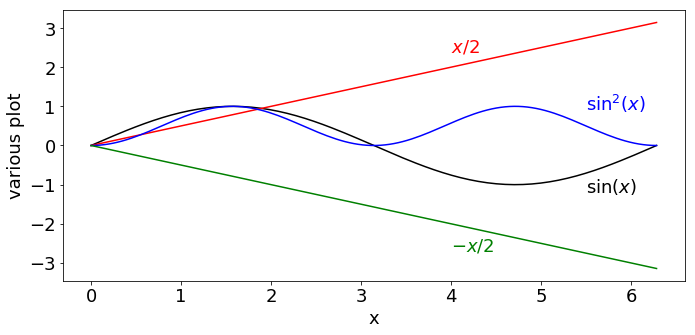

In [21]:
x = np.linspace(0,2*np.pi,128)
y = np.sin(x)

#これまでと同じ設定
plt.rcParams["font.size"] = 18
fig = plt.figure(num=100,figsize=(10, 5))
ax1 = fig.add_subplot(111)

#4個のプロットを行う(ラベルは書かない)
ax1.plot(x,y,color="black")
ax1.plot(x,x/2,color="red")
ax1.plot(x,y**2,color="blue")
ax1.plot(x,-x/2,color="green")

#軸の名前を設定
#axesを設定したときは、軸の名前の設定の仕方が少し違う
#set_　が必要になる。
ax1.set_xlabel("x")
ax1.set_ylabel("various plot")

#ここからannoatateで名前を表示
ax1.annotate("$\sin(x)$",(5.5,-1.2),color="black")
ax1.annotate("$x/2$",(4,2.4),color="red")
ax1.annotate("$\sin^2(x)$",(5.5,0.9),color="blue")
ax1.annotate("$-x/2$",(4,-2.7),color="green")

#文字が重ならないようにするため
plt.tight_layout()

プログラムを見ると、わかるように下の方のannotateのところでテキストを表示している。使い方は
```python
plt.annotate("表示したいテキスト", 表示したい座標, color=色)
```
という感じになっている。もう少し多くを設定できるので、[マニュアル](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html)を参照されたい。
上の二つの図を見比べるとわかるようにplt.legend()を使うと、目でどの線はどのプロットと探さなければいけなくなる。
その点、annotateを使う場合は、線のすぐ横に説明を置けるのでプレゼンなど図を一瞬しか見ることのできない時には
後者が強く推奨される。

次に、実際の天文学のデータをプロットする時に気になることを説明する。
天文学のデータは数値計算・観測に関わらず多くの場合、単位があり、数が大きい。

何も考えずにプロットすると以下のようになる。

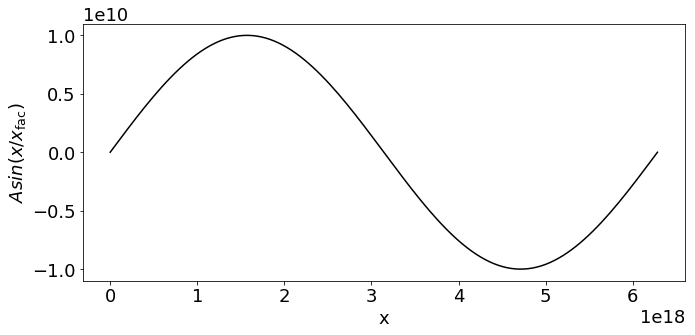

In [29]:
xfac = 1.e18 #大きな数を取り扱うためのファクター
A = 1.e10
x = np.linspace(0,2*np.pi*xfac,128)
y = np.sin(x/xfac)

#これまでと同じ設定
plt.rcParams["font.size"] = 18
fig = plt.figure(num=100,figsize=(10, 5))
ax1 = fig.add_subplot(111)

#4個のプロットを行う(ラベルは書かない)
ax1.plot(x,A*y,color="black")

#軸の名前を設定
#axesを設定したときは、軸の名前の設定の仕方が少し違う
#set_　が必要になる。
ax1.set_xlabel("x")
ax1.set_ylabel("$A sin(x/x_\mathrm{fac})$")


#文字が重ならないようにするため
plt.tight_layout()

上記のように、1e10というような表記がされてしまう。これでも問題はないのだが、
少し見栄えが悪い。

これを改善するために、ある程度の大きさの量で表示されるように、何らかの量で割ってしまう。
そして単位とともにどの程度の量で割っているのかを示すのが見栄えが良いと思われる。
横軸がcm、縦軸がgだったとする。

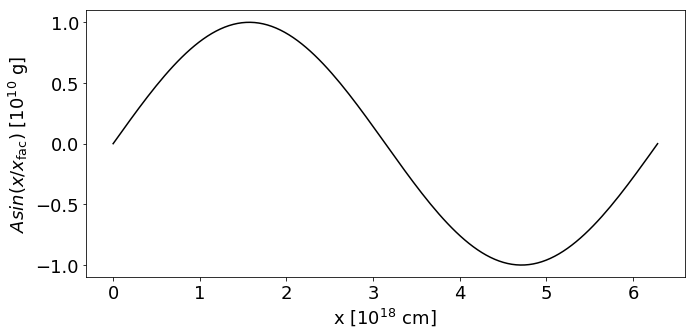

In [31]:
xfac = 1.e18 #大きな数を取り扱うためのファクター
A = 1.e10
x = np.linspace(0,2*np.pi*xfac,128)
y = np.sin(x/xfac)

#これまでと同じ設定
plt.rcParams["font.size"] = 18
fig = plt.figure(num=100,figsize=(10, 5))
ax1 = fig.add_subplot(111)

#4個のプロットを行う(ラベルは書かない)
ax1.plot(x/1.e18,A*y/1.e10,color="black")

#軸の名前を設定
#axesを設定したときは、軸の名前の設定の仕方が少し違う
#set_　が必要になる。
ax1.set_xlabel("x [$10^{18}\ \mathrm{cm}$]")
ax1.set_ylabel("$A sin(x/x_\mathrm{fac})\ [10^{10}\ \mathrm{g}]$")


#文字が重ならないようにするため
plt.tight_layout()

```python
ax1.plot(x/1.e18,A*y/1.e10,color="black")
```
とすることでx軸を$10^{18}$で、y軸を$10^{10}$で割っている。
また、set_labelのところは
```python
ax1.set_xlabel("x [$10^{18}\ \mathrm{cm}$]")
```
 とすることで、$x\ [10^{18}\ \mathrm{cm}]$と表示されるようにしている。注意が必要なのは$$で括られた中身は、Latexモードになっているので、
 空白を入れても、表示には空白は入らない。バックスラッシュの後に空白を入れたものをおくことで、明示的に空白の存在を示す。
 
 最後に対数表示について説明する。
天文学ではすごく桁数の違うデータを一つのグラフで表すことがある。
このような時には対数表示が有効だ

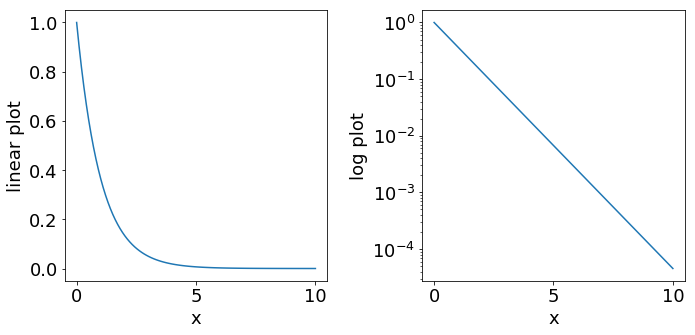

In [43]:
x = np.linspace(0,10,100)
y = np.exp(-x)

#これまでと同じ設定
plt.rcParams["font.size"] = 18
fig = plt.figure(num=100,figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(x,y)

ax2.plot(x,y)
ax2.set_yscale("log") # y軸を対数表示に

ax1.set_xlabel("x")
ax2.set_xlabel("x")

ax1.set_ylabel("linear plot")
ax2.set_ylabel("log plot")

plt.tight_layout()

```python
ax2.set_yscale("log") # y軸を対数表示に
```
というところで、y軸を対数表示にしている。
yscaleをxscaleに変えると、x軸を対数表示にすることができる。
また、対数は基本的に負の値を取り扱えないのだが、yscale("symlog")を
使うことで、負の値も表示してくれる。成層の超断熱率(superadiabaticity)を表示するときなど便利だ

Text(0,0.5,'$\\pm A\\exp (-x)$')

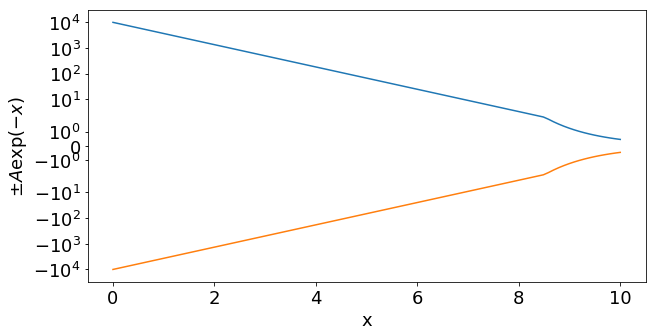

In [74]:
x = np.linspace(0,10,100)
y = np.exp(-x)*1.e4

#これまでと同じ設定
plt.rcParams["font.size"] = 18
fig = plt.figure(num=100,figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(x,y)
ax1.plot(x,-y)
ax1.set_yscale("symlog") # 負の値も扱える対数表示

ax1.set_xlabel("x")
ax1.set_ylabel("$\pm A\exp (-x)$")

symlogは便利なのだが、値が小さい場合に、linear plotに移行してしまう。ここは注意が必要である。
また、上のように軸の目盛りが多すぎて、数字が被ってしまう場合は自分で独自に設定することもできる。

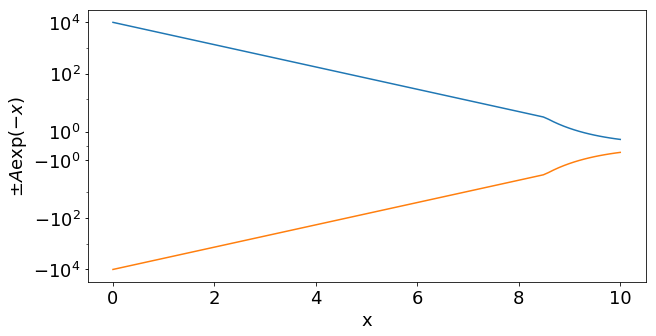

In [78]:
x = np.linspace(0,10,100)
y = np.exp(-x)*1.e4

#これまでと同じ設定
plt.rcParams["font.size"] = 18
fig = plt.figure(num=100,figsize=(10, 5))
ax1 = fig.add_subplot(111)

ax1.plot(x,y)
ax1.plot(x,-y)
ax1.set_yscale("symlog") # 負の値も扱える対数表示

ax1.set_xlabel("x")
ax1.set_ylabel("$\pm A\exp (-x)$")

#目盛りの設定
ax1.set_yticks([-10**4,-10**2,-10**0,10**0,10**2,10**4])

```python
ax1.set_yticks([-10**4,-10**2,-10**0,10**0,10**2,10**4])
```
というところで、y軸の目盛りを設定している。軸はだいたい6個程度なので、手で打ってもさほど手間ではないが